In [15]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex'>

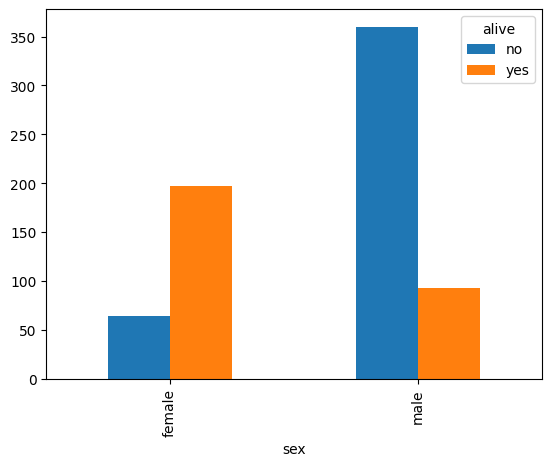

In [10]:
df["alive"].value_counts()
pd.pivot_table(data=df, index="alive", columns="sex", values="age", aggfunc="count").transpose().plot.bar()

In [ ]:
# convert a binary text column to a binary int column --> correlations
df["alive_int"] = (df["alive"] == "yes").astype(int)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64

In [13]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
# make the dates easy to plot
dates = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
df = df.set_index(dates)
df.head()

,year,month,passengers
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


Text(0, 0.5, 'passengers')

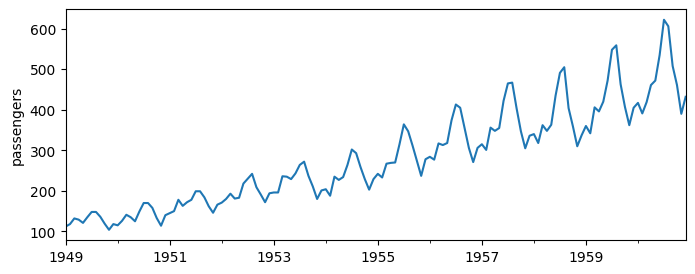

In [24]:
plt.figure(figsize=(8, 3))
df["passengers"].plot()
plt.ylabel("passengers")

np.float64(2.237762237762238)

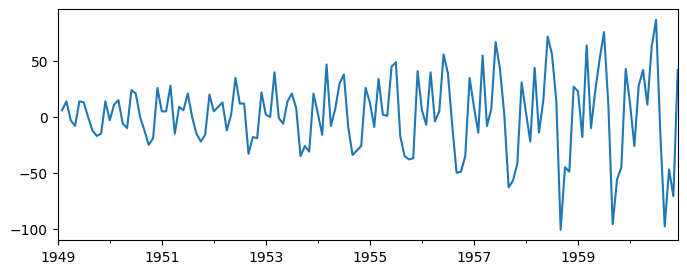

In [ ]:
# remove a linear trend
plt.figure(figsize=(8, 3))
df["diff"] = df["passengers"].diff()
df["diff"].plot()
df["diff"].mean()  # on average, the number of passengers grows by 2.24 each month

np.float64(0.015168535658176796)

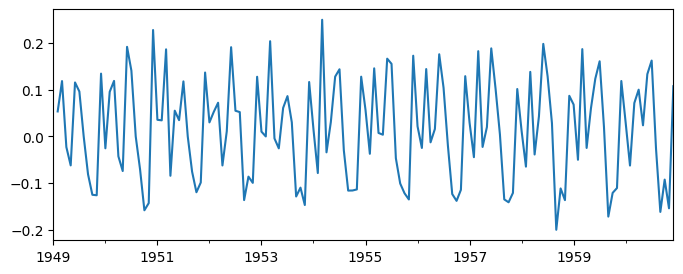

In [ ]:
# remove an exponential trend
plt.figure(figsize=(8, 3))
df["pct"] = df["passengers"].pct_change()
df["pct"].plot()
df["pct"].mean()  # on average, the number of passengers grows by 1.5% each month

C:\Users\team-\AppData\Local\Temp\ipykernel_5856\2524435757.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=df, index="month", values="pct", aggfunc="mean").plot()


<Axes: xlabel='month'>

<Figure size 800x300 with 0 Axes>

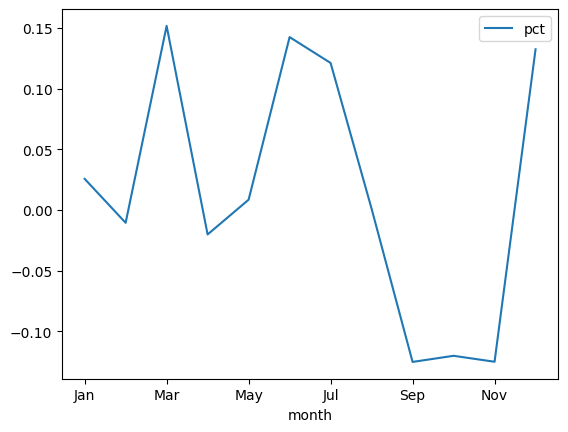

In [38]:
df.index.year
df.index.month
df.index.month_name()

plt.figure(figsize=(8, 3))
pd.pivot_table(data=df, index="month", values="pct", aggfunc="mean").plot()

In [47]:
piv = pd.pivot_table(data=df, index="month", values="pct", aggfunc="mean").values
month_means = list(piv.flatten()) * 12

residual = df["pct"] - month_means


C:\Users\team-\AppData\Local\Temp\ipykernel_5856\4207889176.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = pd.pivot_table(data=df, index="month", values="pct", aggfunc="mean").values


<Axes: >

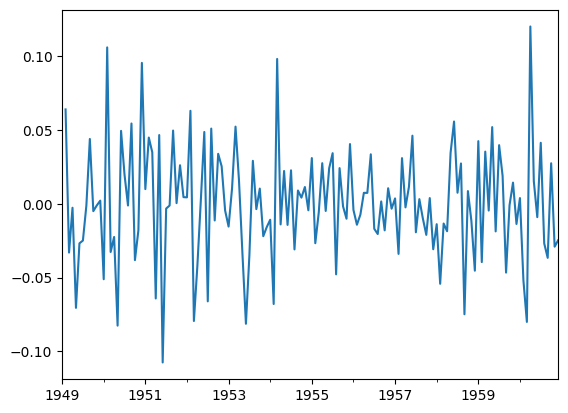

In [ ]:
# what is left over after removing the monthly means from the pct change
# this should be random noise
residual.plot()

<Axes: >

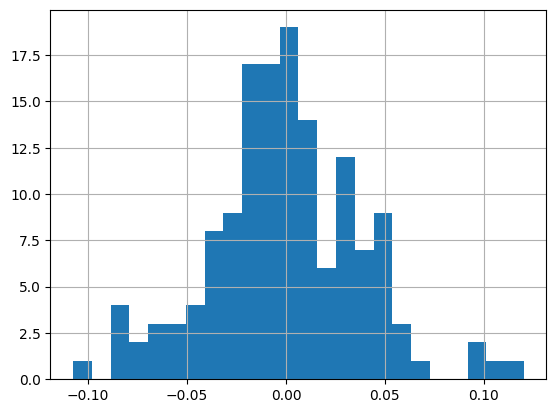

In [51]:
# is it normally distributed?
residual.hist(bins=24)

### Summary

a time series is composed of:

* trend (linear, exponential or other)
* seasonality (repeating patterns)
* watch out for changes in the amplitude (should be the same everywhere)
* random noise